## Carga de Datos 

In [3]:
# Cargar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el dataset
df = pd.read_csv('Datos.csv', sep=';', encoding='utf-8')

# Visualizar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Revisar dimensiones
print("Dimensiones del dataset (filas, columnas):", df.shape)

# Tipos de variables
print("Tipos de variables:")
print(df.dtypes)


Primeras filas del dataset:


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Dimensiones del dataset (filas, columnas): (14291, 19)
Tipos de variables:
ID                      object
Area                     int64
Perimetro              float64
LongitudEjeMayor       float64
LongitudEjeMenor       float64
RelacionAspecto         object
Excentricidad          float64
AreaConvexa            float64
DiametroEquivalente    float64
Medida                 float64
Solidez                float64
Redondez               float64
Compacidad             float64
FactorForma1           float64
FactorForma2           float64
FactorForma3           float64
FactorForma4           float64
DefectoVisible          object
MétodoSecado            object
dtype: object


## Entendimiento de Datos

## Calidad de Datos


In [4]:
#Completitud de Datos
print("Valores nulos por columna:")
print(df.isnull().sum())
print("Porcentaje de valores nulos por columna:")
print((df.isnull().mean() * 100).round(2))

Valores nulos por columna:
ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solidez                2306
Redondez               2063
Compacidad              650
FactorForma1           1119
FactorForma2           1106
FactorForma3            478
FactorForma4           1159
DefectoVisible         2935
MétodoSecado            587
dtype: int64
Porcentaje de valores nulos por columna:
ID                      0.00
Area                    0.00
Perimetro               8.66
LongitudEjeMayor        2.81
LongitudEjeMenor        0.00
RelacionAspecto         3.26
Excentricidad           4.23
AreaConvexa             9.96
DiametroEquivalente    13.46
Medida                  0.00
Solidez                16.14
Redondez               14.44
Compacidad              4.55
FactorForm

In [5]:
df = df.dropna(subset=["RelacionAspecto", "MétodoSecado"])
df.shape


(13258, 19)

In [6]:
#Unicidad de Datos
print(f"Filas duplicadas: {df.duplicated().sum()}")
df = df.drop_duplicates()



Filas duplicadas: 420


In [7]:
#Consistencia de Datos

# Lista de variables que no deben ser negativas
vars_no_neg = [
    "Area", "Perimetro", "LongitudEjeMayor", "LongitudEjeMenor", "Excentricidad", "AreaConvexa",
    "DiametroEquivalente", "Medida", "Solidez",
    "Redondez", "Compacidad",
    "FactorForma1", "FactorForma2", "FactorForma3", "FactorForma4"
]

# Contar negativos por columna
negativos_por_col = {}
for col in vars_no_neg:
    if col in df.columns:
        negativos_por_col[col] = (df[col] < 0).sum()

import pandas as pd
pd.Series(negativos_por_col).sort_values(ascending=False)

# Filas con al menos un valor negativo en las columnas de interés
mask_negativos = (df[vars_no_neg] < 0).any(axis=1)

print("Total filas con al menos un negativo:", mask_negativos.sum())
df = df.loc[~mask_negativos].copy()
print("Filas finales:", df.shape[0])






Total filas con al menos un negativo: 61
Filas finales: 12777


In [8]:
#Validez de Datos
fuera_rango = ((df["Excentricidad"] < 0) | (df["Excentricidad"] > 1)).sum()
print("Valores fuera de [0,1]:", fuera_rango)


Valores fuera de [0,1]: 0


In [9]:
# Variables categóricas que quieres estandarizar
cat_cols = ["RelacionAspecto", "DefectoVisible", "MétodoSecado"]

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()


Validez
Se realizó una revisión exhaustiva de la validez de cada columna del dataset, verificando:

- **Tipo de dato:**  
  Todas las variables numéricas (por ejemplo, Área, Perímetro, Solidez, Redondez, etc.) se encuentran efectivamente como datos numéricos. Las variables categóricas también presentan el tipo de dato adecuado.

- **Rangos:**  
  Se comprobó que los valores numéricos cumplen los rangos y restricciones definidos en el diccionario de datos y en la lógica del dominio (ejemplo: variables geométricas no presentan valores imposibles; valores en rangos como 0–1 están correctamente acotados).

- **Formato de variables categóricas:**  
  Se identificó una inconsistencia de formato: algunas categorías presentan inicial mayúscula y otras todo en minúscula. Esta situación podría provocar particiones artificiales o dificultades en el análisis posterior, por lo cual se ha decidido estandarizar todos los valores categóricos a un único formato para garantizar homogeneidad y evitar errores de interpretación.

**Conclusión:**  
La validación de tipos, rangos y formatos asegura que el dataset cumple con los requisitos básicos de integridad para realizar análisis y modelado confiable. Se documenta la transformación y estandarización de categorías como una buena práctica para robustecer la calidad de los datos.

# Conclusión: Entendimiento y Preprocesamiento de Calidad de Datos

Este proyecto implementó un pipeline secuencial y reflexivo de evaluación de calidad de datos, basado en las siguientes etapas fundamentales:

---

### 1. Entendimiento de los Datos

A partir del diccionario de datos, se realizó una revisión conceptual de cada columna, evaluando nombre, definición y tipo de dato esperado. Todas las variables fueron entendidas según sus definiciones, permitiendo prever el tipo de datos a encontrar. Se documentaron variables con definiciones ambiguas y se reflexionó sobre posibles necesidades de interpretación más precisa antes del análisis.

---

### 2. Completitud

Se exploró sistemáticamente la presencia de valores nulos o vacíos en cada columna. Se detectó un alto porcentaje de valores nulos en algunas variables (e.g., “DefectoVisible”), por lo que se decidió eliminar esta columna debido a su baja completitud y bajo valor analítico tras experimentar distintas estrategias de imputación. En otros campos, se optó por imputar valores usando la media, mediana, o estrategias basadas en el dominio, o bien dejar nulos de forma intencional cuando la imputación sería especulativa. La eliminación de datos completos siempre fue el último recurso aplicado.

---

### 3. Unicidad

Se identificaron registros duplicados exactos (filas idénticas en todas sus columnas), los cuales fueron eliminados para prevenir distorsión estadística, ya que no aportaban información adicional al dataset. Se discutieron consideraciones sobre duplicados parciales y la importancia de definir la clave lógica de unicidad en función del dominio y el objetivo analítico, manteniendo aquellos sólo cuando la evidencia justificaba su presencia múltiple.

---

### 4. Consistencia

Se evaluó la coherencia lógica entre columnas relacionadas. Se eliminaron los registros que presentaban valores imposibles (por ejemplo, valores negativos en variables físicas como área, perímetro o diámetro), con la justificación de que dichos registros contravenían restricciones físicas del objeto de estudio. Se tuvo especial cuidado en no eliminar filas por errores triviales y en documentar la magnitud de la depuración (porcentaje de datos eliminados e impacto en la representatividad).

---

### 5. Validez

Se verificó el cumplimiento de tipos de datos, rangos numéricos y formatos, de acuerdo al diccionario y reglas del dominio. Todas las variables numéricas se encontraron correctamente tipadas, al igual que las categóricas. Se evidenció una inconsistencia en el formato de los valores categóricos (diferencias entre mayúsculas y minúsculas), por lo que se estandarizó su escritura para evitar errores futuros de segmentación y análisis.

---



## EDA

In [10]:
df.describe()


,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,12777.000000,1.169000e+04,12417.000000,12777.000000,12245.000000,11499.000000,11066.000000,12777.000000,10701.000000,10945.000000,12193.000000,11772.000000,11797.000000,12347.000000,11743.000000
mean,52971.187994,7.724319e+05,319.725140,202.163712,0.750606,53528.957996,253.131165,0.749872,0.987129,0.873818,0.799964,0.006570,0.001717,0.643853,0.995076
std,29315.445198,3.252103e+05,85.564301,44.940934,0.092076,29438.273310,59.044091,0.048975,0.004668,0.059226,0.061936,0.001125,0.000595,0.099082,0.004363
min,20420.000000,5.536000e+02,183.601165,122.512653,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.416499,0.947687
25%,36345.000000,6.768748e+05,253.099675,175.888535,0.714842,36726.500000,215.462813,0.718751,0.985646,0.833427,0.762384,0.005911,0.001155,0.581786,0.993723
50%,44568.000000,7.716230e+05,296.308383,192.419462,0.764323,45019.000000,238.431351,0.759980,0.988296,0.883864,0.801174,0.006648,0.001695,0.641880,0.996393
75%,61076.000000,9.537120e+05,376.080592,216.600881,0.810283,61807.000000,279.247628,0.786845,0.989998,0.917064,0.834719,0.007273,0.002172,0.696735,0.997893
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.986812,0.987303,0.010451,0.003665,0.974767,0.999733


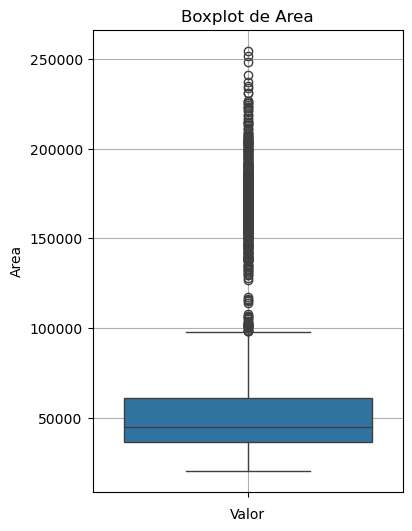

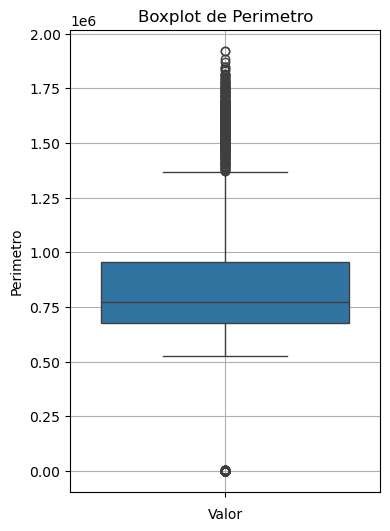

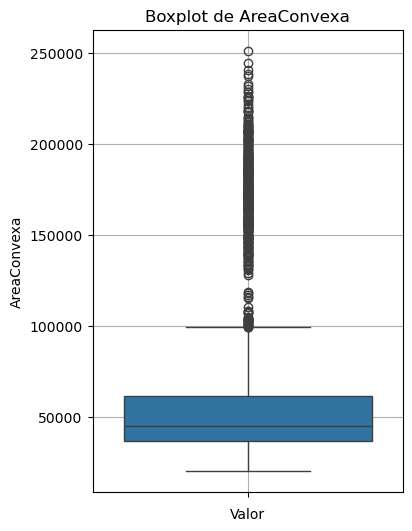

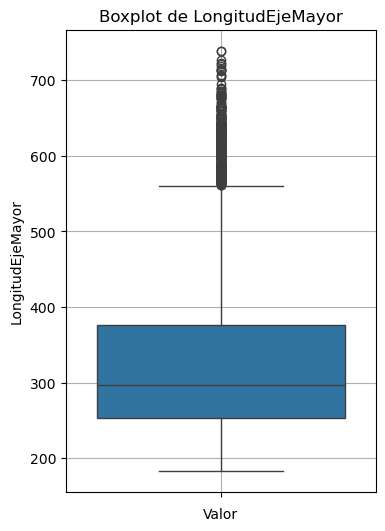

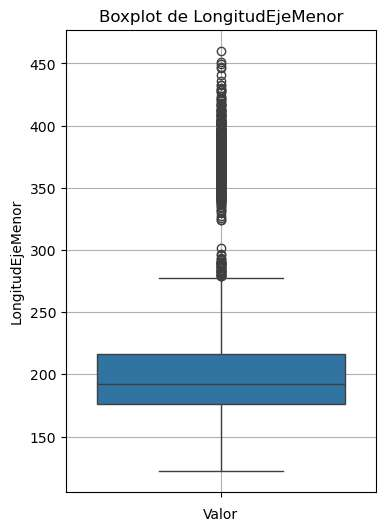

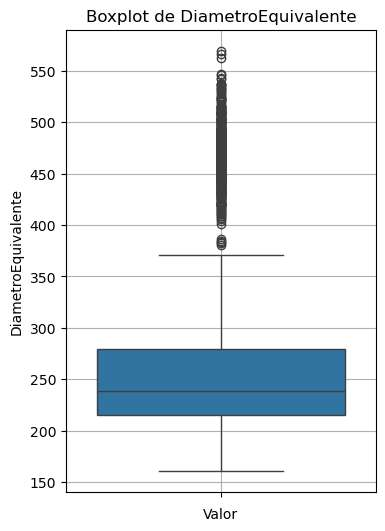

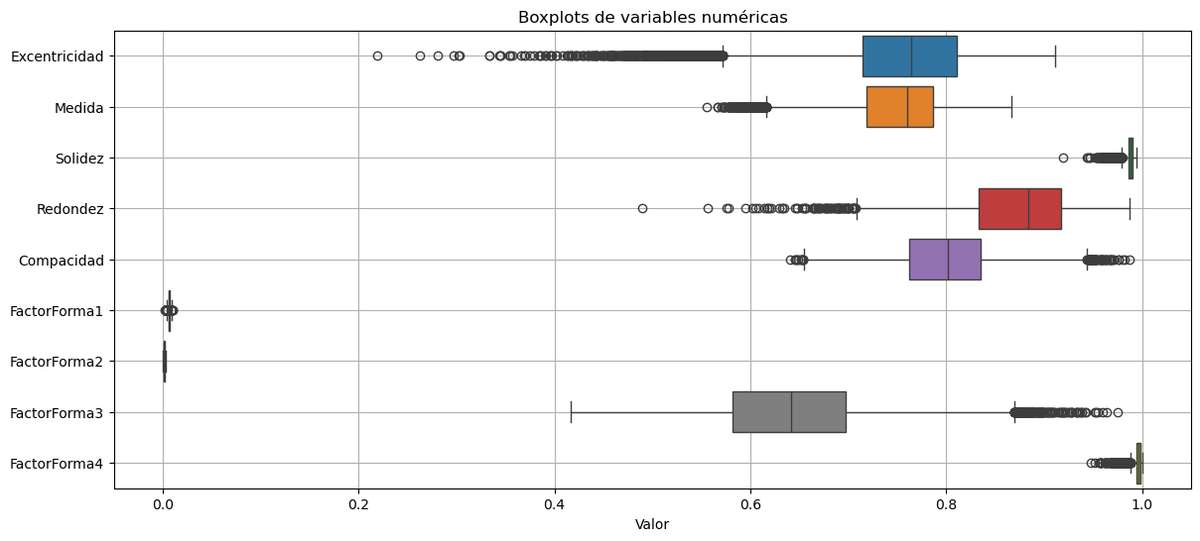

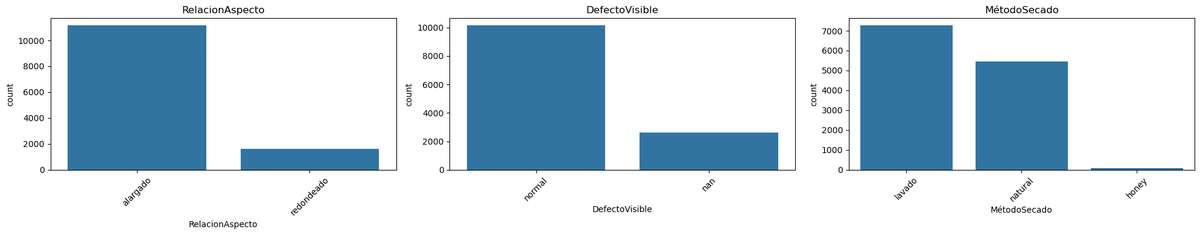

In [11]:

# --- 1. Boxplot de Area ---
plt.figure(figsize=(4, 6))
sns.boxplot(y=df["Area"])
plt.title("Boxplot de Area")
plt.xlabel("Valor")
plt.grid(True)
plt.show()

# --- 2. Boxplot de Perimetro ---
plt.figure(figsize=(4, 6))
sns.boxplot(y=df["Perimetro"])
plt.title("Boxplot de Perimetro")
plt.xlabel("Valor")
plt.grid(True)
plt.show()

# --- 3. Boxplot de AreaConvexa ---
plt.figure(figsize=(4, 6))
sns.boxplot(y=df["AreaConvexa"])
plt.title("Boxplot de AreaConvexa")
plt.xlabel("Valor")
plt.grid(True)
plt.show()

# --- 4. Boxplot de LongitudEjeMayor ---
plt.figure(figsize=(4, 6))
sns.boxplot(y=df["LongitudEjeMayor"])
plt.title("Boxplot de LongitudEjeMayor")
plt.xlabel("Valor")
plt.grid(True)              
plt.show()
# --- 5. Boxplot de LongitudEjeMenor ---
plt.figure(figsize=(4, 6))
sns.boxplot(y=df["LongitudEjeMenor"])
plt.title("Boxplot de LongitudEjeMenor")
plt.xlabel("Valor")
plt.grid(True)
plt.show()  

# --- 6. Boxplot de DiametroEquivalente ---
plt.figure(figsize=(4, 6))
sns.boxplot(y=df["DiametroEquivalente"])                    
plt.title("Boxplot de DiametroEquivalente")
plt.xlabel("Valor")
plt.grid(True)
plt.show()


# Boxplots de variables numéricas
var_num = df.select_dtypes(include=['int64', 'float64'])
var_num = var_num.drop(columns=["Area", "Perimetro", "AreaConvexa", "LongitudEjeMayor", "LongitudEjeMenor",
                                "DiametroEquivalente"], errors="ignore")

plt.figure(figsize=(14, 6))
sns.boxplot(data=var_num, orient="h")
plt.title('Boxplots de variables numéricas')
plt.xlabel('Valor')
plt.grid(True)
plt.show()

# Variables categóricas (object, category)
var_cat = ["RelacionAspecto", "DefectoVisible", "MétodoSecado"]
fig, axes = plt.subplots(1, len(var_cat), figsize=(20, 4))
for idx, var in enumerate(var_cat):
    sns.countplot(x=var, data=df, ax=axes[idx])
    axes[idx].set_title(var)
    axes[idx].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Al analizar los boxplots de las variables geométricas como Área, ÁreaConvexa, LongitudEjeMayor y DiámetroEquivalente, se observa una fuerte presencia de valores atípicos hacia la parte superior de la distribución. La mayoría de los granos se concentran en un rango relativamente estrecho, pero existen casos extremos con medidas muy superiores al promedio. Esto puede reflejar la existencia de granos inusualmente grandes o, en su defecto, posibles errores en el proceso de segmentación y extracción de las características a partir de las imágenes.

En cuanto a los índices normalizados como Excentricidad, Medida, Solidez, Redondez y Compacidad, la mayor parte de los valores se encuentra dentro de los rangos esperados, generalmente entre 0 y 1, lo que confirma la validez general de estas métricas. Sin embargo, se detectan algunos valores fuera de rango que, aunque poco frecuentes, deben ser tratados como inconsistencias y marcados como valores faltantes para no distorsionar los análisis posteriores.

Los Factores de Forma (1–4) presentan distribuciones heterogéneas entre sí, lo que evidencia que cada uno responde a fórmulas distintas. En particular, se encuentran casos con valores muy cercanos a cero en los Factores 1 y 2, situación que podría deberse a problemas de cálculo en la fórmula o a casos extremos difíciles de interpretar. Dado que el diccionario de datos no especifica claramente cómo se construyen estos factores, es necesario revisar su definición antes de tomar decisiones sobre su uso en el modelado.

En relación con las variables categóricas, la Relación de Aspecto muestra un predominio marcado de granos clasificados como alargados, mientras que los redondeados representan una proporción mucho menor y además se detectan algunos valores nulos. La variable DefectoVisible evidencia un claro desbalance: más del 70% de los granos son normales y solo una pequeña fracción corresponde a defectuosos, lo que implica un reto al momento de utilizarla en modelos predictivos por la escasa representación de la clase minoritaria. Por su parte, en MétodoSecado la categoría más frecuente es lavado, seguida por natural, mientras que honey apenas aparece con pocos registros. Además, antes de la estandarización se identificaron inconsistencias en el uso de mayúsculas y minúsculas que podían fragmentar las categorías.

# Exploración grupos

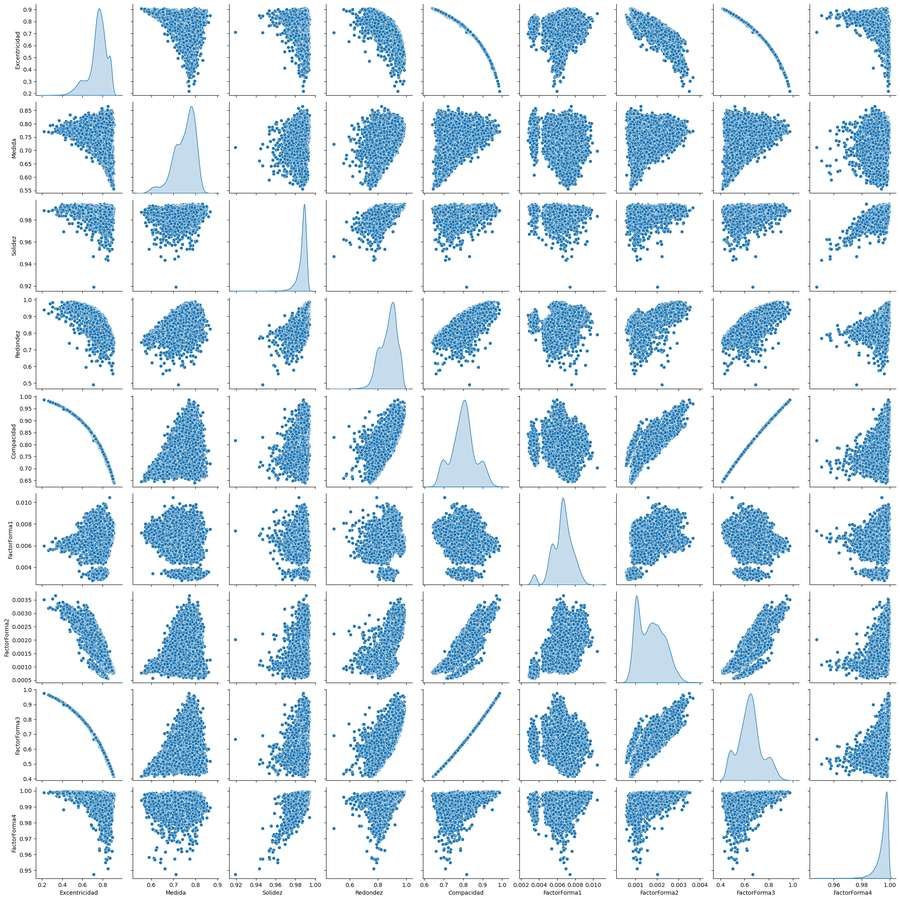

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subconjunto para graficar
sns.pairplot(var_num, diag_kind="kde")
plt.show()


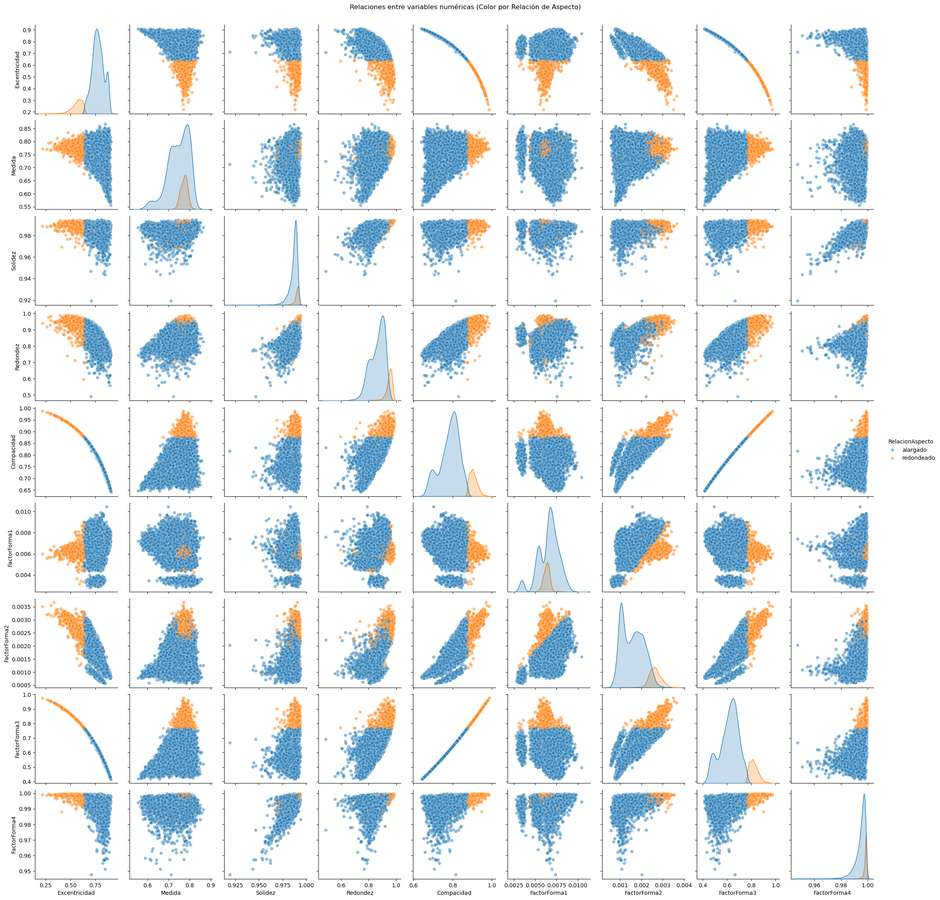

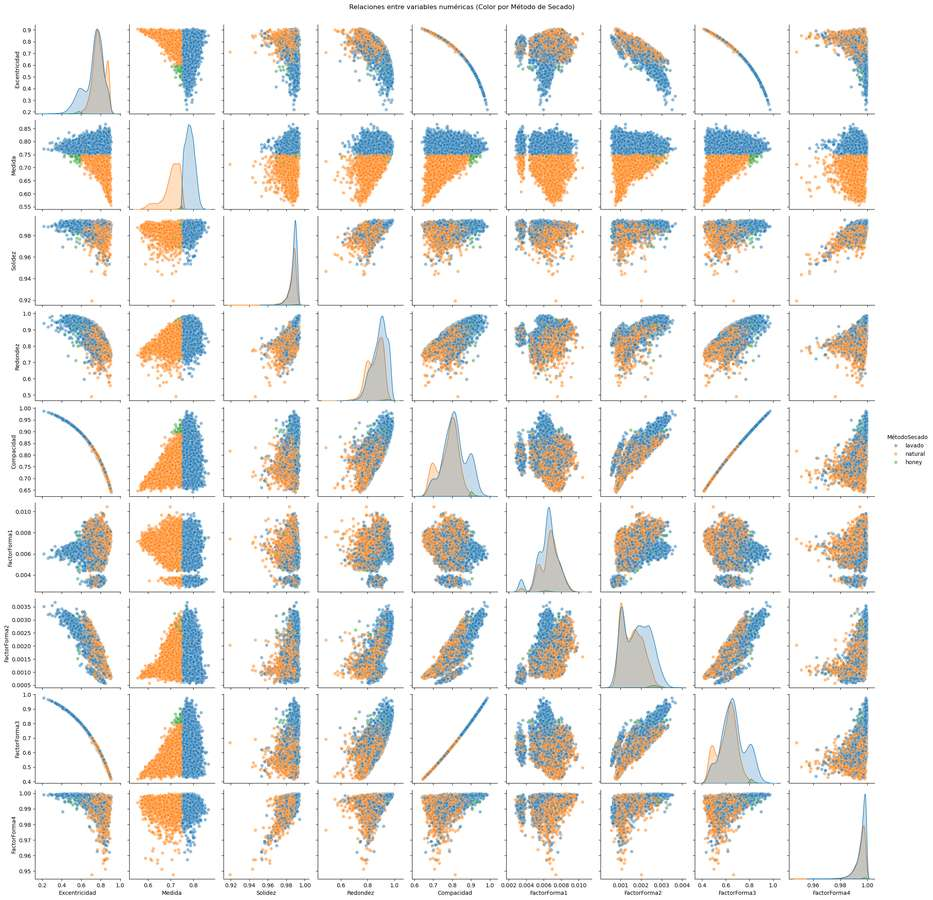

In [13]:
# Pairplot (all vs all) por Relación de Aspecto
sns.pairplot(df, vars=var_num, hue='RelacionAspecto', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Relaciones entre variables numéricas (Color por Relación de Aspecto)', y=1.01)
plt.show()

# Pairplot (all vs all) por Método de Secado

sns.pairplot(df, vars=var_num, hue='MétodoSecado', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Relaciones entre variables numéricas (Color por Método de Secado)', y=1.01)
plt.show()

**RlacionAspecto**

- Los puntos azules (alargados) se agrupan consistentemente en regiones con excentricidad alta y compacidad baja, lo que es coherente con la definición geométrica.

- Los puntos naranjas (redondeados) se concentran en valores intermedios y bajos de excentricidad, y más altos en compacidad y redondez.

**Método de Secado**

- Se puede visualizar una clara diferencia entre lavado y natural en variables como medida en el resto no se puede onservar una clara agrupacion

Estas diferencias reflejan la existencia de subpoblaciones o categorías diferenciadas dentro del dataset, lo que puede ser relevante para posteriores análisis de segmentación, modelado o interpretación de resultados.


# Correlación

In [14]:
# 1. Calcular correlación
corr = df.corr(numeric_only=True)

# 2. Convertir a tabla de pares
corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ["Variable1", "Variable2", "Correlacion"]

# 3. Quitar duplicados y la correlación consigo misma
corr_pairs = corr_pairs[corr_pairs["Variable1"] < corr_pairs["Variable2"]]

# 4. Filtrar correlaciones fuertes
corr_filtradas = corr_pairs[abs(corr_pairs["Correlacion"]) > 0.9]

# 5. Mostrar
print("Correlaciones mayores a 0.9 (en valor absoluto):\n")
print(corr_filtradas.sort_values(by="Correlacion", ascending=False))




Correlaciones mayores a 0.9 (en valor absoluto):

               Variable1            Variable2  Correlacion
5                   Area          AreaConvexa     0.999941
163           Compacidad         FactorForma3     0.998689
81           AreaConvexa  DiametroEquivalente     0.985269
6                   Area  DiametroEquivalente     0.984998
92   DiametroEquivalente     LongitudEjeMayor     0.961456
3                   Area     LongitudEjeMenor     0.951637
78           AreaConvexa     LongitudEjeMenor     0.950604
93   DiametroEquivalente     LongitudEjeMenor     0.947829
77           AreaConvexa     LongitudEjeMayor     0.932274
2                   Area     LongitudEjeMayor     0.931550
168         FactorForma1     LongitudEjeMenor    -0.946789
154           Compacidad        Excentricidad    -0.970393
73         Excentricidad         FactorForma3    -0.981093


Para evitar sesgar el agrupamiento de esas variables que estan altamente correlacionadas solo se deja Area ya que esta captura AreaConvexa, DiametroEquivalente, LongitudEjeMayor y LongitudEjeMenor.

## Preparación de Datos

In [15]:
#Eliminación Variable DefectoVisible
if "DefectoVisible" in df.columns:
    df = df.drop(columns=["DefectoVisible"])

df.head()

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,lavado
1,G007234,62764,1003767.0,409.207082,198.330199,alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,natural
2,G007054,59965,994266.0,389.088529,197.967275,alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,natural
3,G006619,55035,917.6,379.346822,185.390577,alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,lavado
4,G013353,39324,737773.0,262.520242,191.176858,alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,lavado


In [16]:
import numpy as np
import pandas as pd

# --- 1) Recalcular con fórmulas donde sea posible ---

# Solidez = Area / AreaConvexa (evitar división por 0)
if {"Area","AreaConvexa","Solidez"}.issubset(df.columns):
    mask_sol_recalc = df["Solidez"].isna() & df["Area"].notna() & df["AreaConvexa"].gt(0)
    n_sol_recalc = int(mask_sol_recalc.sum())
    df.loc[mask_sol_recalc, "Solidez"] = df.loc[mask_sol_recalc, "Area"] / df.loc[mask_sol_recalc, "AreaConvexa"]
    # opcional: acotar a [0,1] por definición
    df["Solidez"] = df["Solidez"].clip(lower=0, upper=1)

# Redondez = (4πA) / P² (evitar división por 0)
if {"Area","Perimetro","Redondez"}.issubset(df.columns):
    mask_red_recalc = df["Redondez"].isna() & df["Area"].notna() & df["Perimetro"].gt(0)
    n_red_recalc = int(mask_red_recalc.sum())
    df.loc[mask_red_recalc, "Redondez"] = (4 * np.pi * df.loc[mask_red_recalc, "Area"]) / (df.loc[mask_red_recalc, "Perimetro"]**2)
    # opcional: acotar a [0,1] (por discretización puede pasarse levemente)
    df["Redondez"] = df["Redondez"].clip(lower=0, upper=1)

print(f"Solidez recalculada en:  {n_sol_recalc if 'n_sol_recalc' in locals() else 0} filas")
print(f"Redondez recalculada en: {n_red_recalc if 'n_red_recalc' in locals() else 0} filas")

# --- 2) Imputar con la media lo que siga faltando ---
cols_imput_media = ["Perimetro","Solidez","Redondez","Excentricidad","Compacidad",
                    "FactorForma1","FactorForma2","FactorForma3","FactorForma4"]

for col in cols_imput_media:
    if col in df.columns:
        mean_val = df[col].mean(skipna=True)
        n_before = int(df[col].isna().sum())
        df[col] = df[col].fillna(mean_val)
        print(f"{col}: imputadas con media = {mean_val:.6f} | filas afectadas = {n_before}")

# --- (Opcional) Verificación rápida de que ya no hay NaN en estas columnas ---
print("\nNaN restantes en columnas imputadas:")
print(df[ [c for c in cols_imput_media if c in df.columns] ].isna().sum())


Solidez recalculada en:  1878 filas
Redondez recalculada en: 1693 filas
Perimetro: imputadas con media = 772431.947009 | filas afectadas = 1087
Solidez: imputadas con media = 0.987176 | filas afectadas = 198
Redondez: imputadas con media = 0.767573 | filas afectadas = 139
Excentricidad: imputadas con media = 0.750606 | filas afectadas = 532
Compacidad: imputadas con media = 0.799964 | filas afectadas = 584
FactorForma1: imputadas con media = 0.006570 | filas afectadas = 1005
FactorForma2: imputadas con media = 0.001717 | filas afectadas = 980
FactorForma3: imputadas con media = 0.643853 | filas afectadas = 430
FactorForma4: imputadas con media = 0.995076 | filas afectadas = 1034

NaN restantes en columnas imputadas:
Perimetro        0
Solidez          0
Redondez         0
Excentricidad    0
Compacidad       0
FactorForma1     0
FactorForma2     0
FactorForma3     0
FactorForma4     0
dtype: int64


In [17]:
#Escoger características
features = ["Area", "Perimetro", "Excentricidad", "Medida", "Solidez", "Redondez", "Compacidad", 
            "FactorForma1", "FactorForma2", "FactorForma3", "FactorForma4", "RelacionAspecto", "MétodoSecado"]

df_filtrado = df[features].copy()

df_filtrado.head()



,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,RelacionAspecto,MétodoSecado
0,50836,923618.0,0.750606,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,alargado,lavado
1,62764,1003767.0,0.750606,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,alargado,natural
2,59965,994266.0,0.860886,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,alargado,natural
3,55035,917.6,0.872446,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,alargado,lavado
4,39324,737773.0,0.685326,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,alargado,lavado


In [18]:
# Codificar las variables categóricas
# One Hot Encoding para RelacionAspecto y MétodoSecado
df_encoded = pd.get_dummies(
    df_filtrado,
    columns=["RelacionAspecto", "MétodoSecado"],  # columnas categóricas
    prefix=["Aspecto", "Secado"],                 # prefijos de los dummies
    drop_first=False                              # si True elimina una categoría por variable
)

print("Dimensiones antes:", df_filtrado.shape)
print("Dimensiones después:", df_encoded.shape)

df_encoded.head()


Dimensiones antes: (12777, 13)
Dimensiones después: (12777, 16)


,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,Aspecto_alargado,Aspecto_redondeado,Secado_honey,Secado_lavado,Secado_natural
0,50836,923618.0,0.750606,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,True,False,False,True,False
1,62764,1003767.0,0.750606,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,True,False,False,False,True
2,59965,994266.0,0.860886,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,True,False,False,False,True
3,55035,917.6,0.872446,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,True,False,False,True,False
4,39324,737773.0,0.685326,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,True,False,False,True,False


## Estandarización de las variables numéricas

In [19]:
# Estandarización de las variables numéricas
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

num_cols = ["Area", "Perimetro", "Excentricidad", "Medida", "Solidez", "Redondez", "Compacidad",
            "FactorForma1", "FactorForma2", "FactorForma3", "FactorForma4"]

# Prueba Robust
df_robust = df_encoded.copy()
scaler = RobustScaler()
df_robust[num_cols] = scaler.fit_transform(df_robust[num_cols])
#df_robust.head()

# Prueba Standard
df_std = df_encoded.copy()
scaler = StandardScaler()
df_std[num_cols] = scaler.fit_transform(df_std[num_cols])
#df_robust.head()

# Prueba MinMaxScaler
df_mm = df_encoded.copy()
scaler = MinMaxScaler()
df_mm[num_cols] = scaler.fit_transform(df_mm[num_cols])
#df_mm.head()

## PCA Grupos naturales

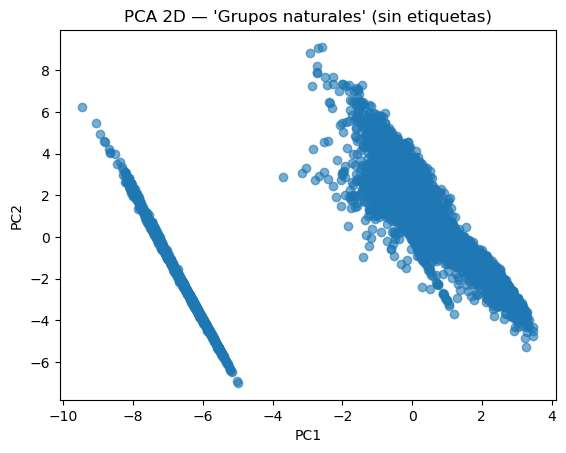

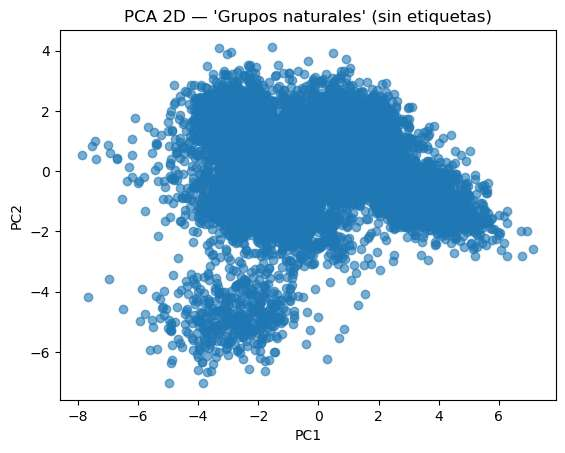

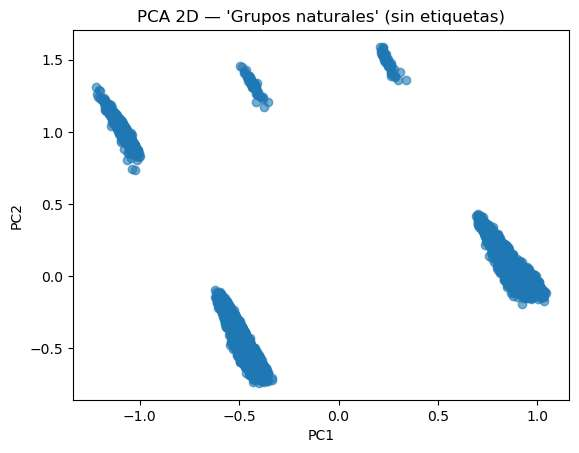

In [20]:
from sklearn.decomposition import PCA
import pandas as pd

pca_robust = PCA(n_components=2, random_state=42)
pca_robust.fit(df_robust)

df_pca_robust = pca_robust.transform(df_robust) # (n_train, 2)
plt.figure()
plt.scatter(df_pca_robust[:,0], df_pca_robust[:,1], alpha=0.6)
plt.title("PCA 2D — 'Grupos naturales' (sin etiquetas)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


pca_std = PCA(n_components=2, random_state=42)
pca_std.fit(df_std)

df_pca_std = pca_std.transform(df_std) # (n_train, 2)
plt.figure()
plt.scatter(df_pca_std[:,0], df_pca_std[:,1], alpha=0.6)
plt.title("PCA 2D — 'Grupos naturales' (sin etiquetas)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


pca_mm = PCA(n_components=2, random_state=42)
pca_mm.fit(df_mm)

df_pca_mm = pca_mm.transform(df_mm) # (n_train, 2)
plt.figure()
plt.scatter(df_pca_mm[:,0], df_pca_mm[:,1], alpha=0.6)
plt.title("PCA 2D — 'Grupos naturales' (sin etiquetas)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



#df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])



In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = ["Area", "Perimetro", "Excentricidad", "Medida", "Solidez", "Redondez", "Compacidad",
            "FactorForma1", "FactorForma2", "FactorForma3", "FactorForma4"]
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.head()

,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,Aspecto_alargado,Aspecto_redondeado,Secado_honey,Secado_lavado,Secado_natural
0,0.129874,0.480480,0.767764,0.802391,0.856327,0.758860,0.199164,0.557056,0.173831,0.155979,0.915241,True,False,False,True,False
1,0.180806,0.522199,0.767764,0.478257,0.782516,0.793268,0.144918,0.487643,0.113455,0.108797,0.710502,True,False,False,False,True
2,0.168854,0.517254,0.927020,0.341823,0.864881,0.772446,0.200683,0.483580,0.146363,0.157319,0.836267,True,False,False,False,True
3,0.147804,0.000189,0.943714,0.786092,0.937969,0.832353,0.165072,0.536261,0.143186,0.126179,0.935583,True,False,False,True,False
4,0.080719,0.383742,0.673493,0.707917,0.925846,0.919999,0.610797,0.507981,0.519020,0.555310,0.959610,True,False,False,True,False


In [22]:


from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2, random_state=42)
pca.fit(df_encoded)

df_pca = pca.transform(df_encoded) # (n_train, 2)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])



In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Guardar resultados
resultados = {}

# Iterar desde 2 hasta 7 componentes
for n in range(2, 8):
    pca = PCA(n_components=n, random_state=42)
    pca.fit(X_scaled)
    
    # % de varianza explicada acumulada
    var_acum = np.sum(pca.explained_variance_ratio_) * 100
    resultados[n] = var_acum

# Convertir a DataFrame para mejor visualización
df_resultados = pd.DataFrame.from_dict(resultados, orient='index', columns=['% Varianza Explicada'])
df_resultados.index.name = 'N° de Componentes'

print(df_resultados)


                   % Varianza Explicada
N° de Componentes                      
2                             55.039845
3                             67.018798
4                             74.518753
5                             80.686674
6                             86.741561
7                             91.402775


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Transformar con ese número
pca = PCA(n_components=5, random_state=42)
df_pca = pca.fit_transform(df_encoded)

df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(5)])

# Modelos

## KMeans

Daniela Echavarria - 202111348

Curva elbow para KMeans

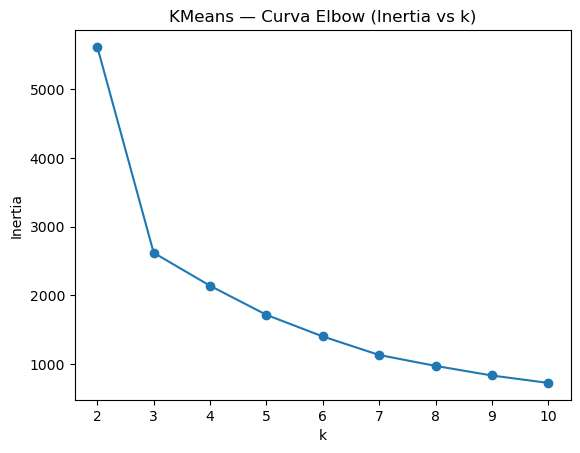

In [23]:
# Curva elbow para KMeans
from sklearn.cluster import KMeans


inertias = []
ks = list(range(2, 11))
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_pca)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(ks, inertias, marker="o")
plt.title("KMeans — Curva Elbow (Inertia vs k)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.xticks(ks)
plt.show()

Se tomo la decisión de utilizar un k= 4, debido a que este es el punto de inflexión de la Curva Elbow

In [24]:
kmeans = KMeans(n_clusters=4, random_state=0) 

res_kmeans = kmeans.fit(df_pca)

centroides_escalados = kmeans.cluster_centers_

<Axes: xlabel='Cluster KMeans'>

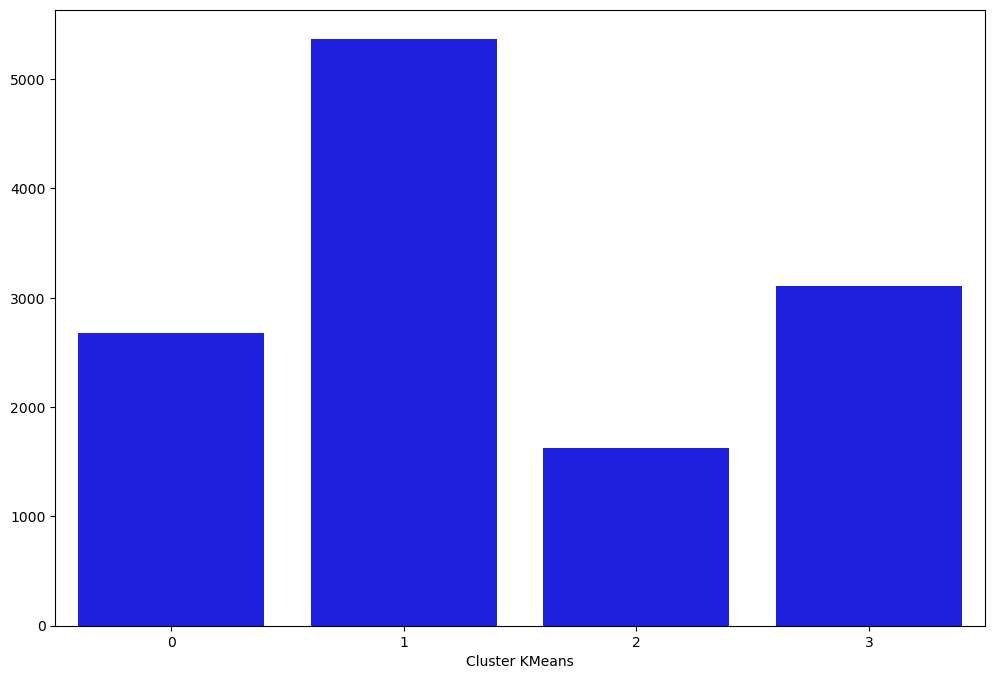

In [25]:

labels = res_kmeans.labels_
df_encoded['Cluster KMeans'] = labels
cluster_distrib = df_encoded['Cluster KMeans'].value_counts()
fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b')

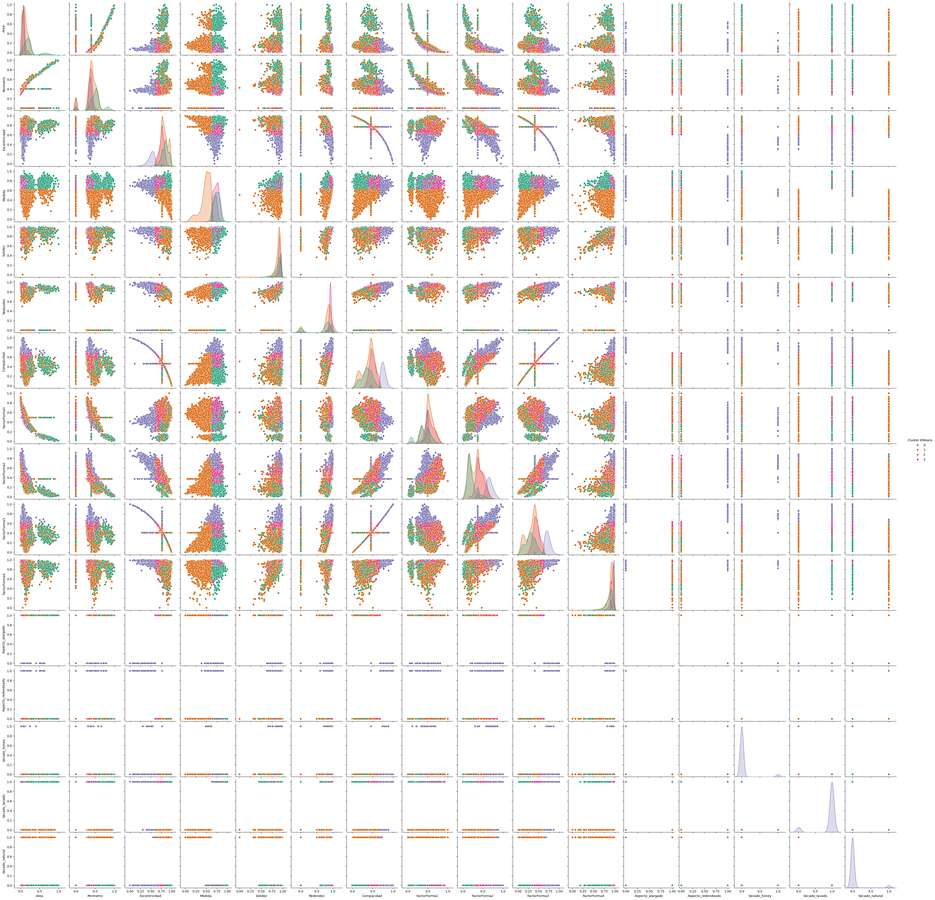

In [26]:
df_encoded["Cluster KMeans"] = kmeans.fit_predict(df_pca)
sns.pairplot(data=df_encoded, hue="Cluster KMeans", palette="Dark2")

El análisis del pairplot muestra que las variables Área, Perímetro, Excentricidad, Redondez y Medida son las que aportan mayor capacidad de separación entre clusters, ya que permiten distinguir grupos con menor solapamiento. En contraste, las variables derivadas como FactorForma1, FactorForma2, FactorForma3 y FactorForma4 presentan alta superposición y no discriminan bien. Las variables categóricas (como Aspecto y Método de secado) refuerzan parcialmente la separación, pero no generan divisiones tan claras como las métricas geométricas principales. En conclusión, las variables geométricas básicas son las más útiles para la segmentación del dataset.

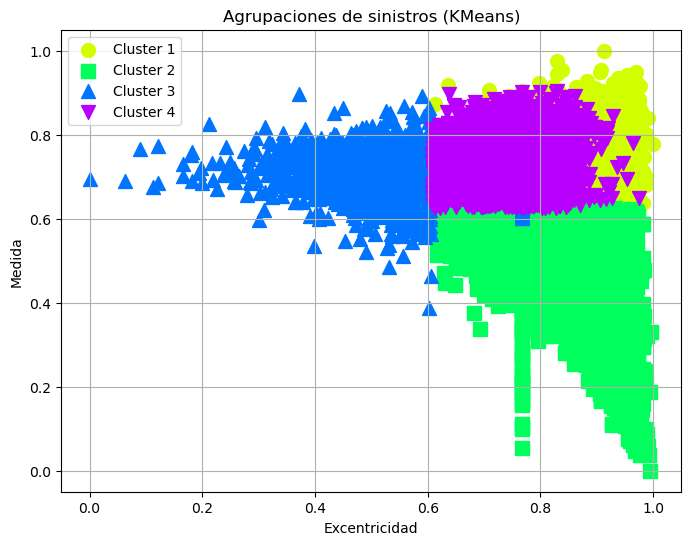

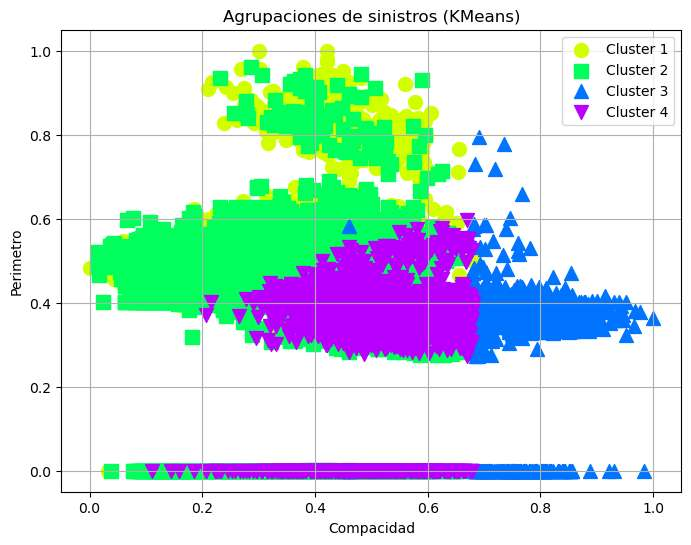

In [27]:
# features = ["Area", "Perimetro", "Excentricidad", "Medida", "Solidez", "Redondez", "Compacidad", 
#            "FactorForma1", "FactorForma2", "FactorForma3", "FactorForma4", "RelacionAspecto", "MétodoSecado"]



def plot_clusters_2d(data, labels, centroids, first_feature, second_feature, title="Clusters 2D", xlabel="PC1", ylabel="PC2"):
    plt.figure(figsize=(8,6))
    unique_labels = np.unique(labels)
    markers = ['o', 's', '^', 'v', '*', 'D', 'P', 'X']
    colors = sns.color_palette("hsv", len(unique_labels))

    for i, label in enumerate(unique_labels):
        plt.scatter(data[labels == label, first_feature], data[labels == label, second_feature], 
                    s=100, marker=markers[i % len(markers)], color=colors[i], label=f'Cluster {label+1}')

    #plt.scatter(centroids[:, 0], centroids[:, 3], s=200, c='black', marker='X', label='Centroids')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_clusters_2d(data=df_encoded.to_numpy(), labels=df_encoded["Cluster KMeans"], centroids=centroides_escalados, first_feature=2, second_feature=3,
                title="Agrupaciones de sinistros (KMeans)", xlabel="Excentricidad", ylabel="Medida")

plot_clusters_2d(data=df_encoded.to_numpy(), labels=df_encoded["Cluster KMeans"], centroids=centroides_escalados, first_feature=6, second_feature=1,
                title="Agrupaciones de sinistros (KMeans)", xlabel="Compacidad", ylabel="Perimetro")

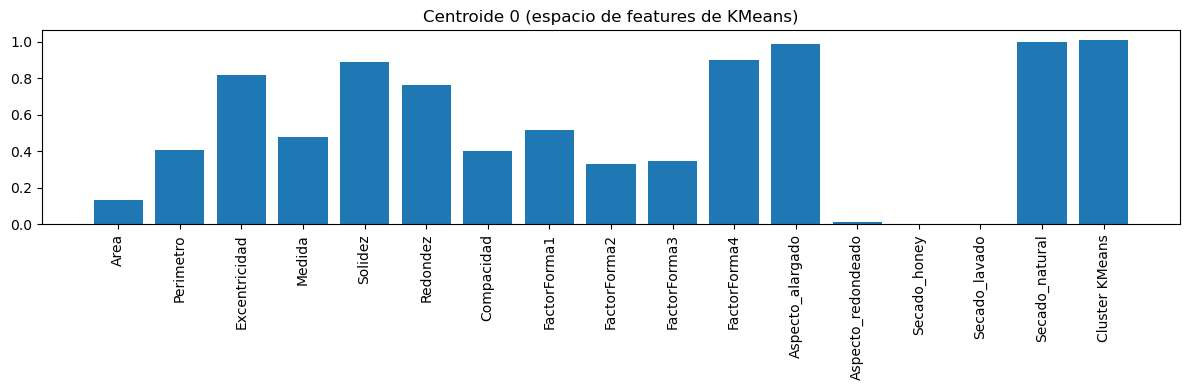

In [28]:
# X_kmeans son las columnas con las que ajustaste KMeans
X_kmeans = df_encoded.drop(columns=['ID'], errors='ignore')   # o las que hayas usado
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_kmeans)

feature_names = X_kmeans.columns            # ←  coincide con cluster_centers_.shape[1]
centroide0 = kmeans.cluster_centers_[0]

plt.figure(figsize=(12,4))
plt.bar(feature_names, centroide0)
plt.xticks(rotation=90)
plt.title("Centroide 0 (espacio de features de KMeans)")
plt.tight_layout()
plt.show()


## Graficar Siluetas

In [29]:
#Creamos una función basada en el concepto de silueta
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm



def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2 3]


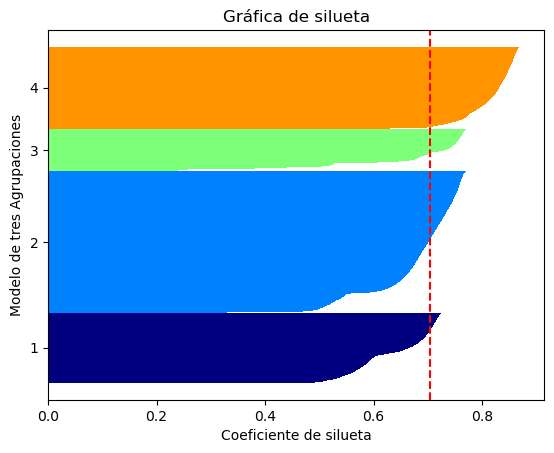

In [30]:
plot_silhouette(data = df_encoded.to_numpy(), 
                labels = res_kmeans.labels_, 
                ylabel = 'Modelo de tres Agrupaciones')

Se probaron diferentes configuraciones de clusters utilizando el coeficiente de silueta como criterio de evaluación. Con k=5 se observaron grupos más dispersos, con algunos clusters poco definidos y un promedio de silueta más bajo, lo que indica menor cohesión y separación entre ellos. En cambio, con k=4 se obtuvo un resultado más sólido: los clusters aparecen mejor delimitados, con un promedio de silueta cercano a 0.65–0.68 y sin valores negativos significativos, lo que refleja que la mayoría de las observaciones fueron correctamente asignadas. Por tanto, el modelo con k=4 clusters ofrece una partición más clara y de mejor calidad que el de k=5.

## Gaussian Mixture Models (GMM)



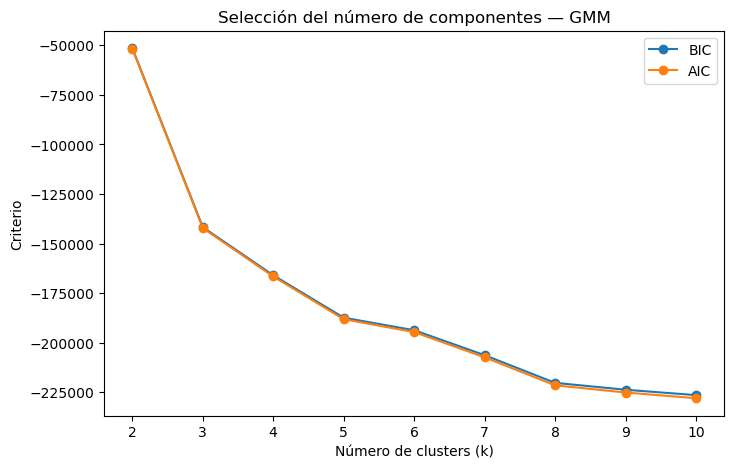

In [31]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

bics = []
aics = []
ks = list(range(2, 11))

for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=10)
    gmm.fit(df_pca)
    bics.append(gmm.bic(df_pca))
    aics.append(gmm.aic(df_pca))

plt.figure(figsize=(8,5))
plt.plot(ks, bics, marker="o", label="BIC")
plt.plot(ks, aics, marker="o", label="AIC")
plt.title("Selección del número de componentes — GMM")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Criterio")
plt.legend()
plt.show()


[0 1 2 3]


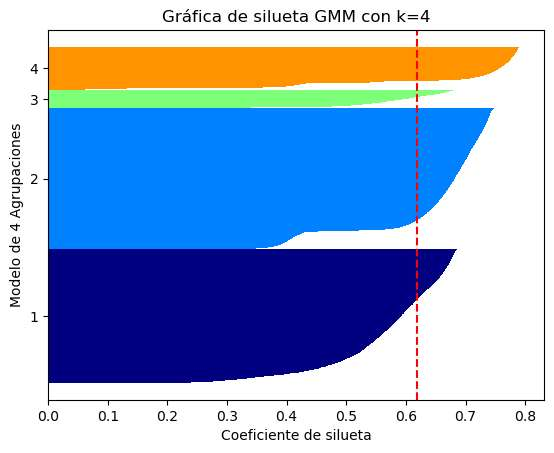

[0 1 2 3 4]


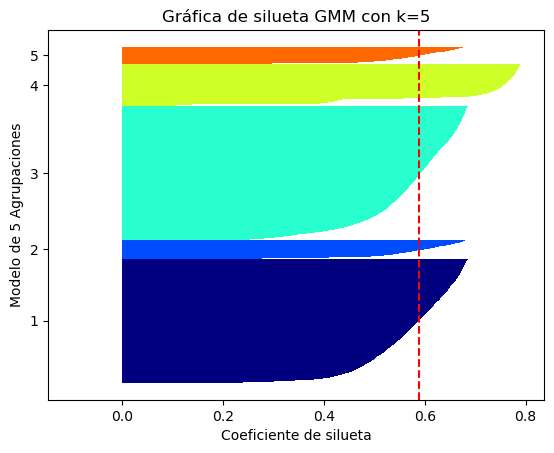

[0 1 2 3 4 5]


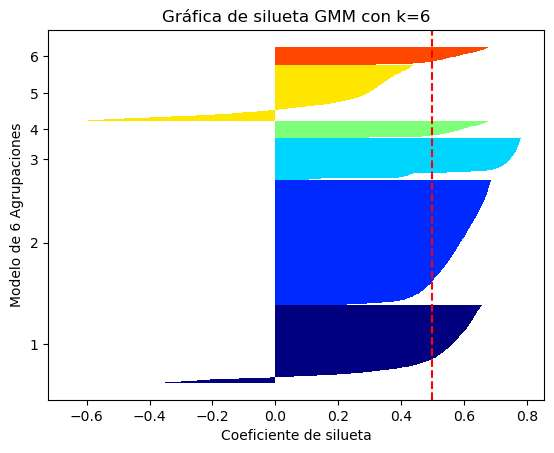

In [35]:
gmm4 = GaussianMixture(n_components=4, covariance_type="full", random_state=42, n_init=10)
gmm4.fit(df_pca)
gmm_labels4 = gmm4.predict(df_pca)
plot_silhouette(data = df_pca,
                labels = gmm_labels4,
                ylabel = 'Modelo de 4 Agrupaciones',
                title = 'Gráfica de silueta GMM con k=4')

gmm5 = GaussianMixture(n_components=5, covariance_type="full", random_state=42, n_init=10)
gmm5.fit(df_pca)
gmm_labels5 = gmm5.predict(df_pca)
plot_silhouette(data = df_pca,
                labels = gmm_labels5,
                ylabel = 'Modelo de 5 Agrupaciones',
                title = 'Gráfica de silueta GMM con k=5')

gmm6 = GaussianMixture(n_components=6, covariance_type="full", random_state=42, n_init=10)
gmm6.fit(df_pca)
gmm_labels6 = gmm6.predict(df_pca)
plot_silhouette(data = df_pca,
                labels = gmm_labels6,
                ylabel = 'Modelo de 6 Agrupaciones',
                title = 'Gráfica de silueta GMM con k=6')

<Axes: xlabel='Cluster GMM'>

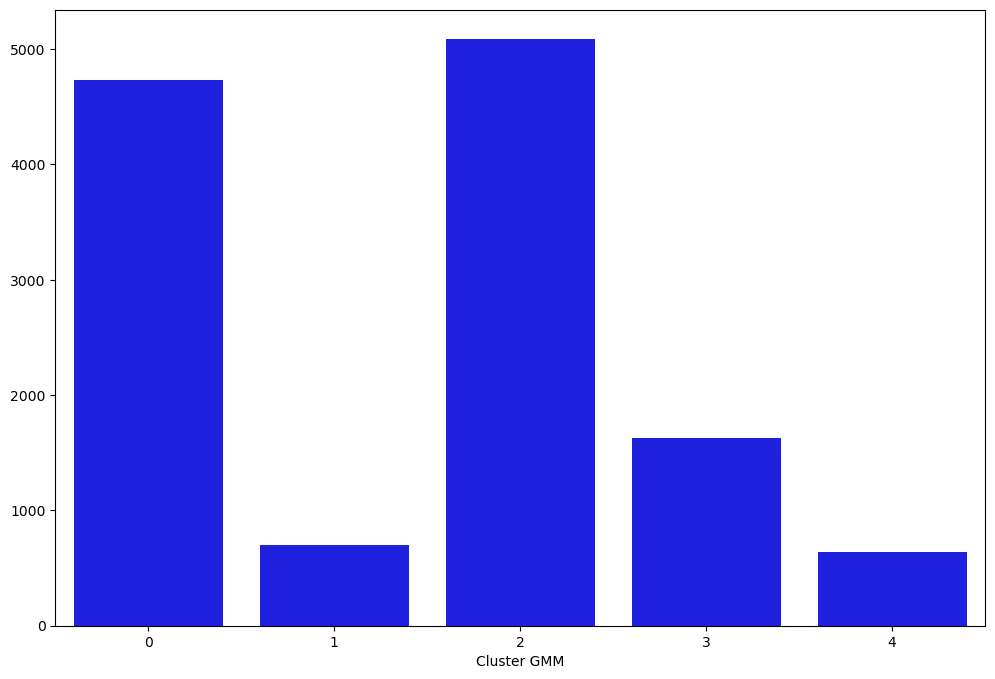

In [36]:
df_encoded['Cluster GMM'] = gmm_labels5
cluster_distrib = df_encoded['Cluster GMM'].value_counts()
fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b')

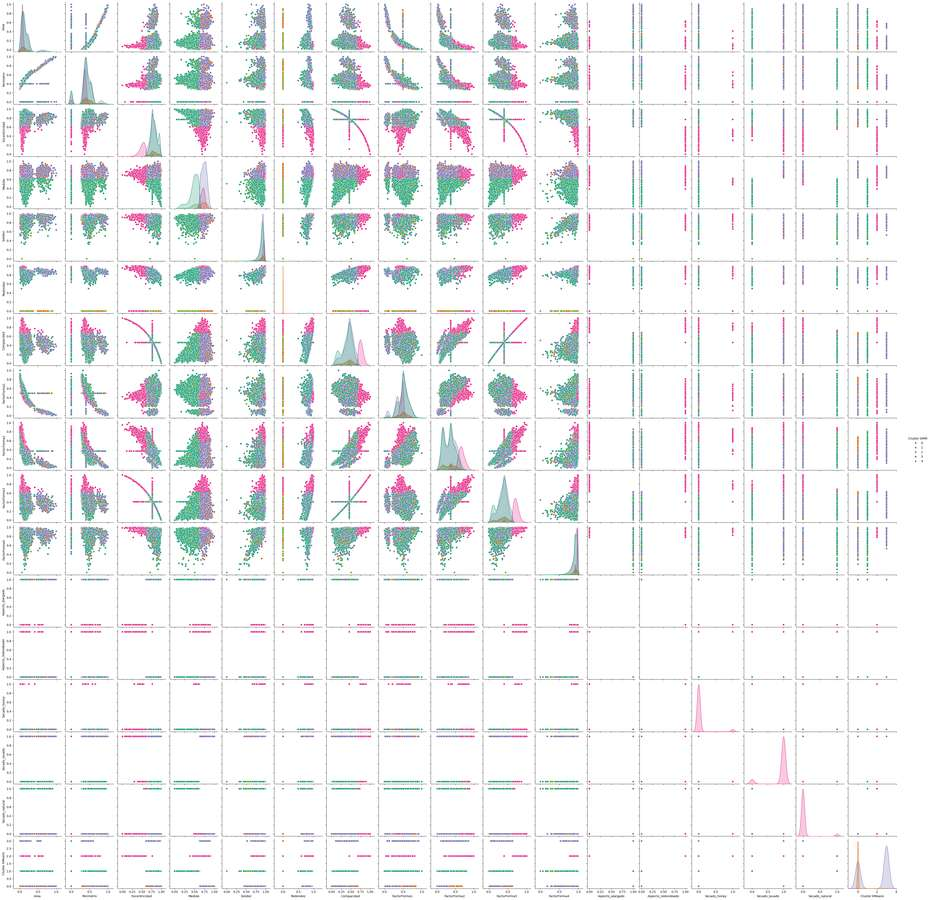

In [37]:
df_encoded["Cluster GMM"] = gmm5.fit_predict(df_pca.drop(columns=["ID"], errors="ignore"))
sns.pairplot(data=df_encoded, hue="Cluster GMM", palette="Dark2")

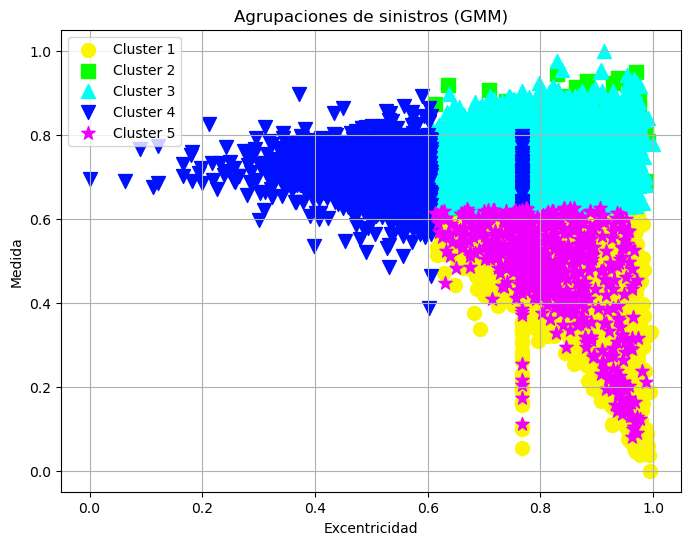

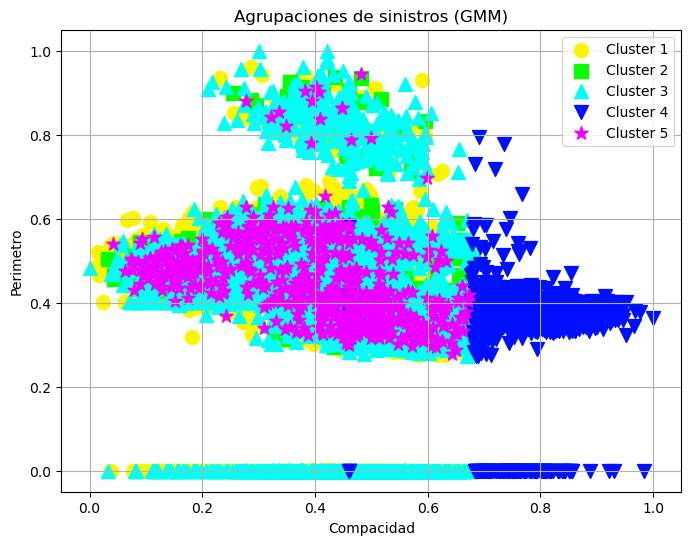

In [38]:
# features = ["Area", "Perimetro", "Excentricidad", "Medida", "Solidez", "Redondez", "Compacidad", 
#            "FactorForma1", "FactorForma2", "FactorForma3", "FactorForma4", "RelacionAspecto", "MétodoSecado"]

plot_clusters_2d(data=df_encoded.to_numpy(), labels=df_encoded["Cluster GMM"], centroids=centroides_escalados, first_feature=2, second_feature=3,
                title="Agrupaciones de sinistros (GMM)", xlabel="Excentricidad", ylabel="Medida")

plot_clusters_2d(data=df_encoded.to_numpy(), labels=df_encoded["Cluster GMM"], centroids=centroides_escalados, first_feature=6, second_feature=1,
                title="Agrupaciones de sinistros (GMM)", xlabel="Compacidad", ylabel="Perimetro")


# DBSCAN — búsqueda de hiperparámetros y métricas

Juan Manuel Rodriguez - 202013372

### Gráfico *k-distance plot* (Curva elbow para DBSCAN)
Este gráfico muestra la **distancia al vecino más cercano** (definida por el parámetro `min_samples`) para todos los puntos del dataset, ordenados de menor a mayor.  
- El “codo” o punto donde la curva cambia bruscamente indica un buen valor para el hiperparámetro **`eps`**, que define el radio de vecindad en DBSCAN.  
- Valores más pequeños de `eps` generan más clusters (o ruido), mientras que valores grandes pueden fusionar clusters distintos.


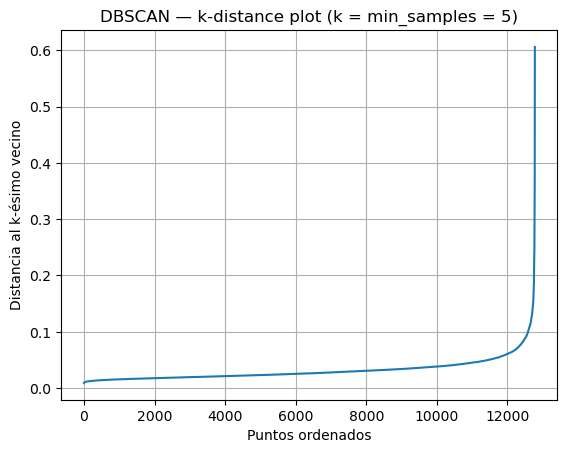

In [27]:
# Curva k-distance para DBSCAN (equivalente al elbow)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

X_db = df_pca.values if hasattr(df_pca, "values") else df_pca

min_samples = 5  # puedes probar 3,5,8,12
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_db)
distances, indices = nbrs.kneighbors(X_db)

# k-distance = distancia al k-ésimo vecino (columna -1)
k_dist = np.sort(distances[:, -1])

plt.figure()
plt.plot(k_dist)
plt.title(f"DBSCAN — k-distance plot (k = min_samples = {min_samples})")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al k-ésimo vecino")
plt.grid(True)
plt.show()


In [28]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Candidatos de eps a partir de percentiles de la k-distance
percentiles = [85, 90, 92, 94, 95, 96, 97, 98]
eps_candidates = [np.percentile(k_dist, p) for p in percentiles]
min_samples_candidates = [3, 5, 8, 12]

results = []
best = {"eps": None, "min_samples": None, "labels": None, "score": -np.inf, "metrics": None}

def safe_metrics(X, y):
    uniq = [c for c in np.unique(y) if c != -1]
    if len(uniq) < 2:
        return {"silhouette": np.nan, "calinski_harabasz": np.nan, "davies_bouldin": np.nan}
    return {
        "silhouette": silhouette_score(X, y),
        "calinski_harabasz": calinski_harabasz_score(X, y),
        "davies_bouldin": davies_bouldin_score(X, y),
    }

for eps in eps_candidates:
    for ms in min_samples_candidates:
        dbs = DBSCAN(eps=eps, min_samples=ms, n_jobs=-1)
        labels_db = dbs.fit_predict(X_db)
        n_noise = np.sum(labels_db == -1)
        ruido_pct = n_noise / len(labels_db)
        n_clusters = len([c for c in np.unique(labels_db) if c != -1])

        met = safe_metrics(X_db, labels_db)
        # criterio similar al de KMeans de tu equipo: sil ↑, CH ↑, DB ↓, penaliza ruido
        score = 0.0
        if not np.isnan(met["silhouette"]):
            score += met["silhouette"]
            score += (met["calinski_harabasz"] if not np.isnan(met["calinski_harabasz"]) else 0) / 10000.0
            score -= (met["davies_bouldin"] if not np.isnan(met["davies_bouldin"]) else 0) * 0.2
        score -= ruido_pct * 0.3

        results.append({
            "eps": eps, "min_samples": ms, "clusters": n_clusters,
            "ruido": n_noise, "ruido_pct": round(ruido_pct,3),
            **met, "score": score
        })

        if score > best["score"]:
            best.update({"eps": eps, "min_samples": ms, "labels": labels_db, "score": score, "metrics": met})

df_dbscan_grid = pd.DataFrame(results).sort_values("score", ascending=False)
display(df_dbscan_grid.head(10))

print(f"Mejor DBSCAN: eps={best['eps']:.4f}, min_samples={best['min_samples']}")
print("Métricas:", best["metrics"])
print("Clusters (excl. ruido):", len([c for c in np.unique(best["labels"]) if c != -1]))
print("Ruido:", int((best["labels"] == -1).sum()))

labels_dbscan = best["labels"]

# Adjuntar etiquetas al mismo df_encoded (igual que con KMeans)
df_encoded["Cluster DBSCAN"] = labels_dbscan


,eps,min_samples,clusters,ruido,ruido_pct,silhouette,calinski_harabasz,davies_bouldin,score
31,0.090374,12,10,309,0.024,0.531902,7942.929415,1.233775,1.072185
29,0.090374,5,14,127,0.010,0.530937,6808.634110,1.166678,0.975483
30,0.090374,8,13,199,0.016,0.484794,6824.304356,1.175479,0.927456
22,0.070340,8,12,462,0.036,0.499174,6633.021278,1.198750,0.911879
27,0.078851,12,11,456,0.036,0.497384,6521.355468,1.224061,0.894001
25,0.078851,5,16,192,0.015,0.520955,5619.980377,1.149283,0.848588
26,0.078851,8,11,330,0.026,0.377092,7173.489629,1.215359,0.843621
23,0.070340,12,13,635,0.050,0.466651,5600.447897,1.188845,0.774017
28,0.090374,3,18,79,0.006,0.418766,5570.856584,1.120039,0.749989
19,0.064658,12,12,818,0.064,0.470593,5418.900016,1.217248,0.749827


Mejor DBSCAN: eps=0.0904, min_samples=12
Métricas: {'silhouette': 0.5319019487785586, 'calinski_harabasz': 7942.929414605638, 'davies_bouldin': 1.2337750204343398}
Clusters (excl. ruido): 10
Ruido: 309


### Distribución de clusters (barras)
En esta gráfica de barras se visualiza la **frecuencia de elementos en cada cluster**.  
- Cada barra corresponde a un cluster detectado por DBSCAN.  
- El cluster `-1` representa los **puntos de ruido** (granos que no encajan en ningún grupo denso).  
- Una distribución balanceada es útil para interpretar grupos consistentes; demasiado ruido o clusters muy pequeños pueden indicar un mal ajuste de parámetros.

---

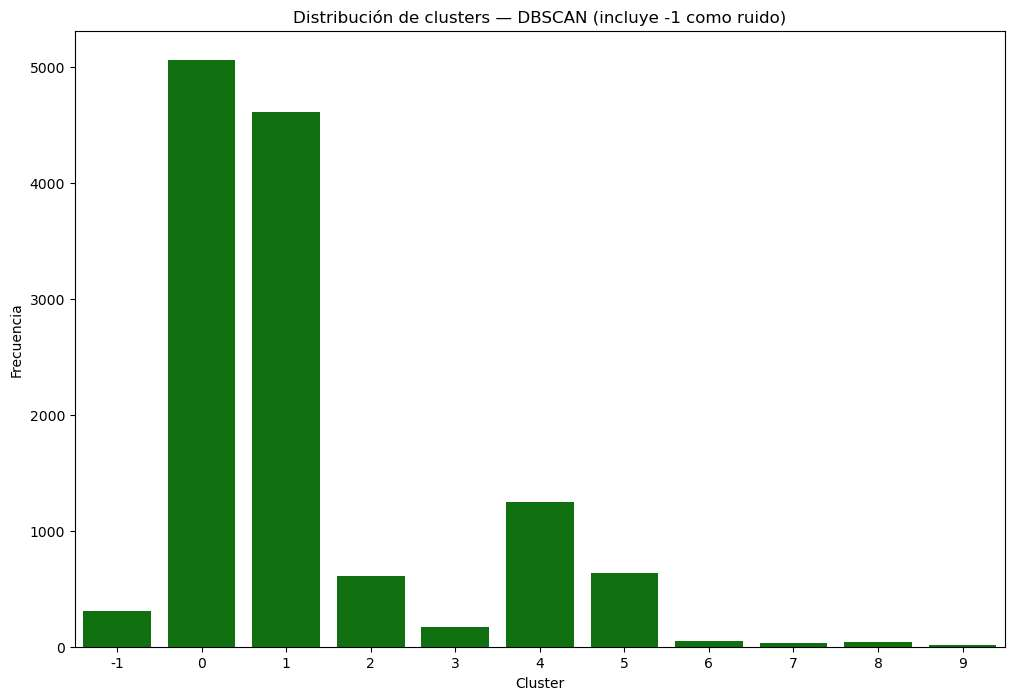

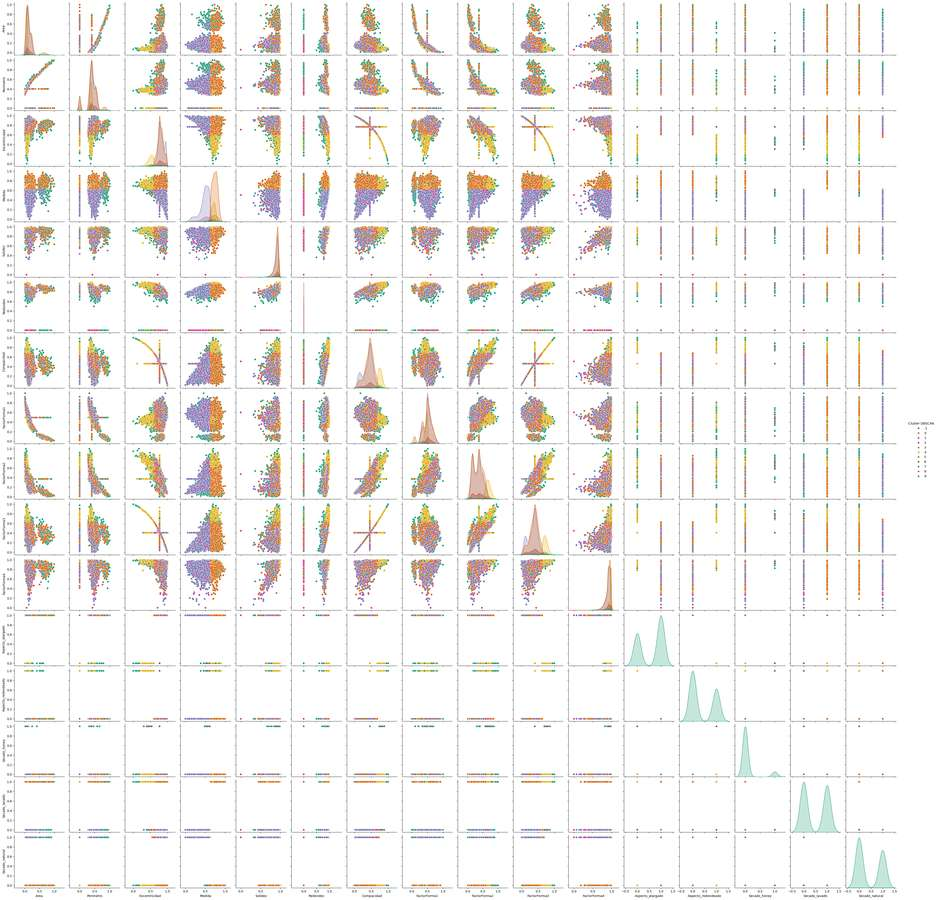

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_distrib_db = df_encoded["Cluster DBSCAN"].value_counts().sort_index()
plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib_db.index, y=cluster_distrib_db.values, color='g')
plt.title("Distribución de clusters — DBSCAN (incluye -1 como ruido)")
plt.xlabel("Cluster")
plt.ylabel("Frecuencia")
plt.show()

# Pairplot (ojo: si el dataset es grande puede tardar; considera muestrear)
sns.pairplot(data=df_encoded, hue="Cluster DBSCAN", palette="Dark2")


### Gráfica de Silueta
La silueta mide la **calidad del agrupamiento**:  
- Valores cercanos a **1** significan que los puntos están bien asignados a su cluster (alta cohesión y buena separación).  
- Valores cercanos a **0** indican que los puntos están en la frontera entre clusters.  
- Valores negativos (<0) sugieren que el punto está mal clasificado.  

In [32]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

def plot_silhouette(data, labels, 
                    ylabel='Grupos',
                    xlabel="Coeficiente de silueta",
                    title='Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parámetros
    ----------
    data : np.array
        Matriz de datos
    labels : np.array
        Etiquetas de cluster
    '''
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]
    
    silhouette_vals = silhouette_samples(data, labels, metric='euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()


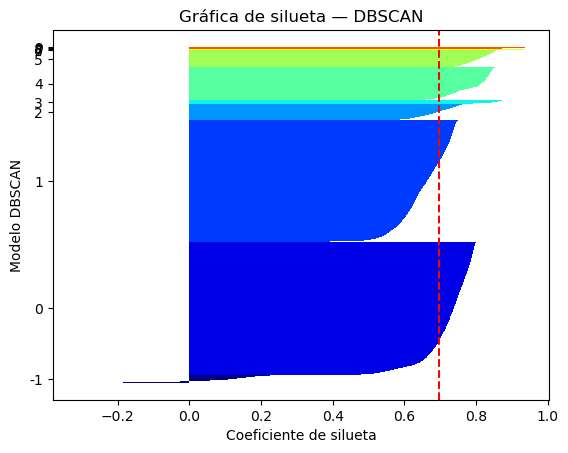

In [34]:
valid_clusters = [c for c in np.unique(labels_dbscan) if c != -1]
if len(valid_clusters) >= 2:
    plot_silhouette(
        data = df_encoded.to_numpy(),
        labels = df_encoded["Cluster DBSCAN"].to_numpy(),
        ylabel = 'Modelo DBSCAN',
        title = 'Gráfica de silueta — DBSCAN'
    )
else:
    print("DBSCAN no generó >=2 clusters válidos (excluyendo ruido); silueta no aplicable.")


### Gráficos 2D de agrupación
Estos gráficos proyectan los datos en dos variables específicas (por ejemplo, **Excentricidad vs Medida**, o **Compacidad vs Perímetro**) para observar la separación de clusters:  
- Cada color y forma representa un cluster distinto.  
- Los puntos etiquetados como `-1` (ruido) se muestran aparte, destacando granos con características morfológicas atípicas.  
- Es útil para interpretar cómo atributos particulares influyen en la formación de clusters.


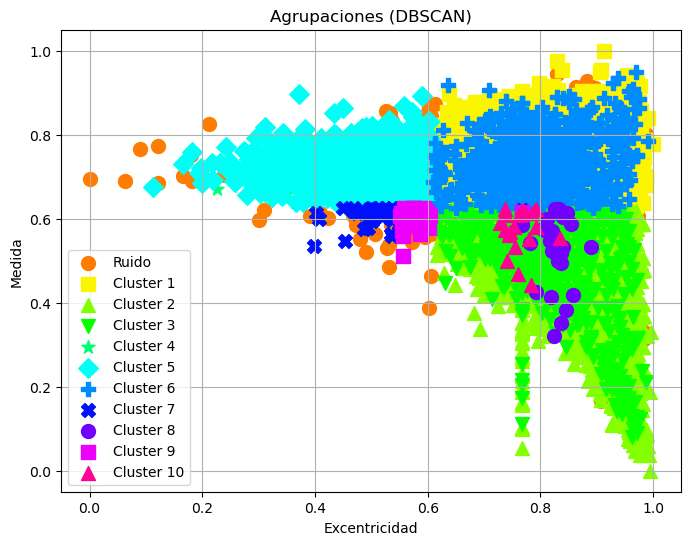

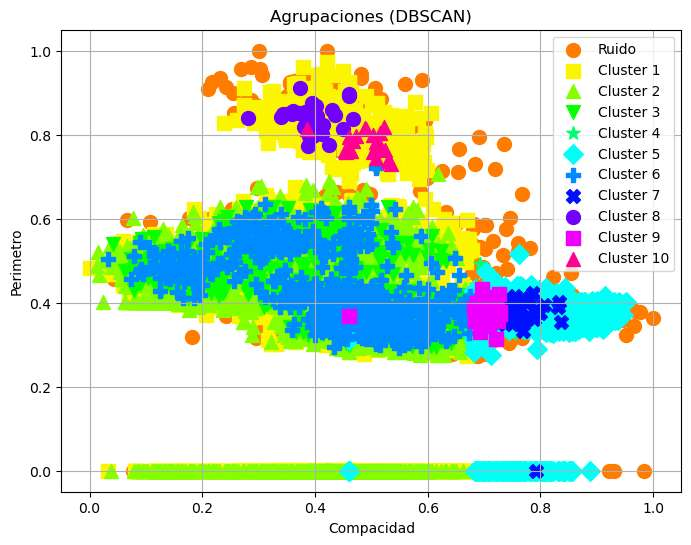

In [30]:
def plot_clusters_2d(data, labels, centroids=None, first_feature=0, second_feature=1,
                     title="Clusters 2D", xlabel="PC1", ylabel="PC2"):
    plt.figure(figsize=(8,6))
    unique_labels = np.unique(labels)
    markers = ['o', 's', '^', 'v', '*', 'D', 'P', 'X']
    colors = sns.color_palette("hsv", len(unique_labels))

    for i, label in enumerate(unique_labels):
        plt.scatter(data[labels == label, first_feature], data[labels == label, second_feature],
                    s=100, marker=markers[i % len(markers)], color=colors[i],
                    label=('Ruido' if label == -1 else f'Cluster {int(label)+1}'))

    # No hay centroides en DBSCAN
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot 2D en las mismas features que usaste para KMeans
plot_clusters_2d(
    data=df_encoded.to_numpy(),
    labels=df_encoded["Cluster DBSCAN"].to_numpy(),
    centroids=None,
    first_feature=2, second_feature=3,
    title="Agrupaciones (DBSCAN)", xlabel="Excentricidad", ylabel="Medida"
)

plot_clusters_2d(
    data=df_encoded.to_numpy(),
    labels=df_encoded["Cluster DBSCAN"].to_numpy(),
    centroids=None,
    first_feature=6, second_feature=1,
    title="Agrupaciones (DBSCAN)", xlabel="Compacidad", ylabel="Perimetro"
)
